<a href="https://colab.research.google.com/github/costenaro0/Analise-de-Dados/blob/main/Projeto_De_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports básicos
import numpy as np
import pandas as pd

# Visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Específicos para modelos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_curve, auc

In [ ]:
import kagglehub

# Carregando o dataset através do kaggle
path = kagglehub.dataset_download("uciml/iris")

# Conferindo o caminho salvo
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'iris' dataset.
Path to dataset files: /kaggle/input/iris


In [ ]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')

df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Exploracao de Dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
df.nunique()

,0
Id,150
SepalLengthCm,35
SepalWidthCm,23
PetalLengthCm,43
PetalWidthCm,22
Species,3


In [ ]:
df.duplicated().sum()

np.int64(0)

# Analise Exploratoria

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
px.imshow(df.drop(['Id', 'Species'], axis=1).corr(),title="Correlação das features: Iris Species", )

In [ ]:
# Identificando outliers

for coluna in df:
    if coluna != "Species":
        fig = px.box(df, y=coluna, x="Species", title=f"Distribuição de {coluna} por Species")
        fig.show()

In [ ]:
def remove_outliers(df, colunas):
  df_filtrado = df.copy()
  for coluna in colunas:
    Q1 = df_filtrado[coluna].quantile(0.25)
    Q3 = df_filtrado[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df_filtrado = df_filtrado[(df_filtrado[coluna] >= limite_inferior) & (df_filtrado[coluna] <= limite_superior)]
  return df_filtrado

colunas_outliers = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
df_sem_outliers = remove_outliers(df, colunas_outliers)

In [ ]:
print(f"Linhas restantes após remoção de outliers: {df_sem_outliers.shape[0]}")

Linhas restantes após remoção de outliers: 146


# DataPrep

In [ ]:
colunas_obj = df.select_dtypes("object").columns.to_list()

colunas_obj

['Species']

In [ ]:
features_categ = df[colunas_obj]
df_prep = pd.get_dummies(df, columns=colunas_obj)

df_prep

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,True,False,False
1,2,4.9,3.0,1.4,0.2,True,False,False
2,3,4.7,3.2,1.3,0.2,True,False,False
3,4,4.6,3.1,1.5,0.2,True,False,False
4,5,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,False,False,True
146,147,6.3,2.5,5.0,1.9,False,False,True
147,148,6.5,3.0,5.2,2.0,False,False,True
148,149,6.2,3.4,5.4,2.3,False,False,True


In [ ]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       150 non-null    int64  
 1   SepalLengthCm            150 non-null    float64
 2   SepalWidthCm             150 non-null    float64
 3   PetalLengthCm            150 non-null    float64
 4   PetalWidthCm             150 non-null    float64
 5   Species_Iris-setosa      150 non-null    bool   
 6   Species_Iris-versicolor  150 non-null    bool   
 7   Species_Iris-virginica   150 non-null    bool   
dtypes: bool(3), float64(4), int64(1)
memory usage: 6.4 KB


# Modelo

In [ ]:
# Imports necessários
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score

In [ ]:
# Definimos quem é a nossa variável target
target="Species"

feature_col_arvore=df.columns.to_list()
feature_col_arvore.remove(target)

In [ ]:
X=df[feature_col_arvore]
y=df[target]

In [ ]:
feature_col_arvore = [col for col in df.columns if col != target and col != 'Id']

acc_Dtree=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df,y=y)):

    X_train=df.loc[trn_,feature_col_arvore]
    y_train=df.loc[trn_,target]

    X_valid=df.loc[val_,feature_col_arvore]
    y_valid=df.loc[val_,target]


    y_train_encoded = pd.get_dummies(y_train)
    y_valid_encoded = pd.get_dummies(y_valid)


    clf=DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_leaf=5)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)


    y_pred_encoded = pd.get_dummies(y_pred, columns=y_valid_encoded.columns)

    y_pred_encoded = y_pred_encoded.reindex(columns=y_valid_encoded.columns, fill_value=0)


    print(f"Fold : {fold+1} : ")
    print(classification_report(y_valid,y_pred))
    acc = roc_auc_score(y_valid_encoded, y_pred_encoded, multi_class='ovr')
    acc_Dtree.append(acc)
    print(f"Acurácia para {fold+1} : {acc}")

Fold : 1 : 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

Acurácia para 1 : 0.975
Fold : 2 : 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Acurácia para 2 : 1.0
Fold : 3 : 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10

In [ ]:
media_acc = np.mean(acc_Dtree)

print(media_acc)

0.9550000000000001


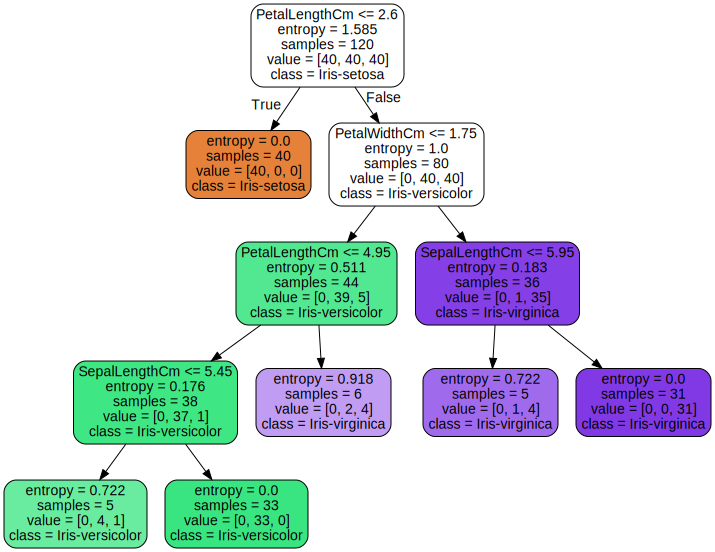

In [ ]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=feature_col_arvore,
                                class_names=df['Species'].unique(),
                                filled=True, rounded=True)

# Mostra a árvore
graph = graphviz.Source(dot_data, format="png")
graph

Matriz de Confusao

In [ ]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_valid)
y_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica'], dtype=object)

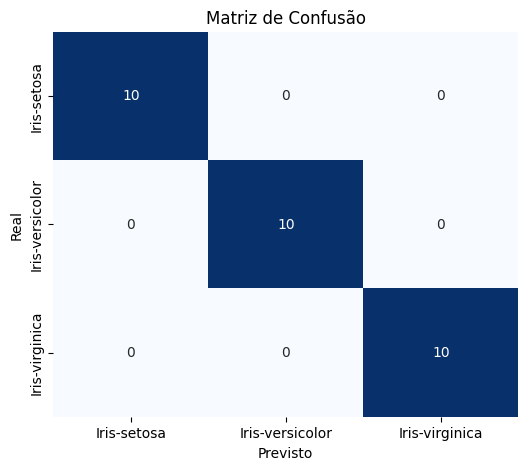

In [ ]:
cm = confusion_matrix(y_valid,y_pred) # Remove labels parameter

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=df['Species'].unique(),
            yticklabels=df['Species'].unique())

plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

# ROC

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_leaf=5)
clf.fit(X_train,y_train)
y_prob=clf.predict_proba(X_valid)

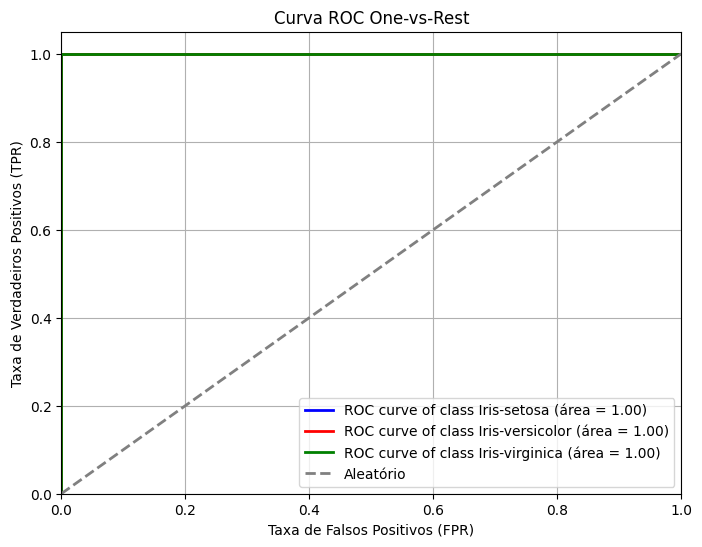

In [ ]:
# Calculate ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}

# Encode y_valid for one-vs-rest
from sklearn.preprocessing import label_binarize
y_valid_bin = label_binarize(y_valid, classes=np.unique(y_valid))

# Get the number of classes
n_classes = y_valid_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_valid_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green'] # Define colors for each class

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (área = {1:0.2f})'
             ''.format(df['Species'].unique()[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Aleatório')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC One-vs-Rest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()